In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

##데이터 불러오기
아파트매매가격 = pd.read_excel('/Users/sia/Desktop/캡스톤/월별동향_아파트_매매가격.xlsx',header=None)

###아파트매매가격
df = 아파트매매가격.iloc[[0,47],1:151].T
df.columns = ['날짜','성남시아파트매매가격']
df['날짜'] = pd.to_datetime(df['날짜'].astype(str).apply(lambda x : x.ljust(7, '0')))
df['날짜'] = df['날짜'].dt.strftime("%Y.%m")
print(df)

df.to_excel('성남시아파트매매가격.xlsx', index=False, engine='openpyxl')

          날짜 성남시아파트매매가격
1    2012.01     506489
2    2012.02     504858
3    2012.03     502607
4    2012.04     500748
5    2012.05     499260
..       ...        ...
146  2024.02    1041591
147  2024.03    1038140
148  2024.04    1035741
149  2024.05    1036444
150  2024.06    1045601

[150 rows x 2 columns]


In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

##데이터 불러오기
아파트매매가격 = pd.read_excel('/Users/sia/Desktop/캡스톤/월별동향_아파트_매매가격.xlsx',header=None)

###아파트매매가격
test_df = 아파트매매가격.iloc[[0,75],1:151].T
test_df.columns = ['날짜','시흥시아파트매매가격']
test_df['날짜'] = pd.to_datetime(test_df['날짜'].astype(str).apply(lambda x : x.ljust(7, '0')))
test_df['날짜'] = test_df['날짜'].dt.strftime("%Y.%m")
print(test_df)

test_df.to_excel('시흥시아파트매매가격.xlsx', index=False, engine='openpyxl')

          날짜 시흥시아파트매매가격
1    2012.01     190944
2    2012.02     191093
3    2012.03     190667
4    2012.04     190556
5    2012.05     189361
..       ...        ...
146  2024.02     366004
147  2024.03     364946
148  2024.04     365005
149  2024.05     364655
150  2024.06     365614

[150 rows x 2 columns]


In [17]:
print(df['성남시아파트매매가격'].dtype)
print(test_df['시흥시아파트매매가격'].dtype)

object
object


In [18]:
print(df.columns)
print(test_df.columns)


Index(['날짜', '성남시아파트매매가격'], dtype='object')
Index(['날짜', '시흥시아파트매매가격'], dtype='object')


In [26]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

##데이터 불러오기
아파트매매가격 = pd.read_excel('/Users/sia/Desktop/캡스톤/월별동향_아파트_매매가격.xlsx',header=None)

###성남시아파트매매가격
df = 아파트매매가격.iloc[[0, 47], 1:151].T
df.columns = ['날짜', '성남시아파트매매가격']
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y.%m', errors='coerce')
df['성남시아파트매매가격'] = pd.to_numeric(df['성남시아파트매매가격'], errors='coerce')

###시흥시아파트매매가격
test_df = 아파트매매가격.iloc[[0, 75], 1:151].T
test_df.columns = ['날짜', '시흥시아파트매매가격']
test_df['날짜'] = pd.to_datetime(test_df['날짜'], format='%Y.%m', errors='coerce')
test_df['시흥시아파트매매가격'] = pd.to_numeric(test_df['시흥시아파트매매가격'], errors='coerce')


# 2. 데이터 병합
merged_df = pd.merge(df, test_df, on='날짜', how='inner')

# 3. 처리군/대조군 및 정책 기간 변수 생성
# 그룹 구분 (성남시: 1, 시흥시: 0)
merged_df['group'] = 1  # 성남시
sh_df = merged_df[['날짜', '시흥시아파트매매가격']].copy()
sh_df.rename(columns={'시흥시아파트매매가격': 'price'}, inplace=True)
sh_df['group'] = 0  # 시흥시

sn_df = merged_df[['날짜', '성남시아파트매매가격']].copy()
sn_df.rename(columns={'성남시아파트매매가격': 'price'}, inplace=True)
sn_df['group'] = 1  # 성남시

# 두 그룹 데이터 병합
final_df = pd.concat([sn_df, sh_df])
final_df['날짜'] = pd.to_datetime(final_df['날짜'], format='%Y.%m')

# 정책 기간 설정
final_df['policy_1'] = (final_df['날짜'] >= '2017-09').astype(int)  # 첫 번째 정책
final_df['policy_2'] = (final_df['날짜'] >= '2020-06').astype(int)  # 두 번째 정책
final_df['policy_3'] = (final_df['날짜'] >= '2023-01').astype(int)  # 세 번째 정책

# 상호작용항 생성
final_df['interaction_1'] = final_df['group'] * final_df['policy_1']
final_df['interaction_2'] = final_df['group'] * final_df['policy_2']
final_df['interaction_3'] = final_df['group'] * final_df['policy_3']

# 4. 이중차분법 회귀 분석
# 두 정책을 포함한 모형
model = smf.ols('price ~ group + policy_1 + policy_2 + policy_3 + interaction_1 + interaction_2 + interaction_3', data=final_df)
result = model.fit()

# 5. 결과 출력
print(result.summary())





                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1112.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):          2.21e-206
Time:                        16:28:20   Log-Likelihood:                -3703.7
No. Observations:                 300   AIC:                             7423.
Df Residuals:                     292   BIC:                             7453.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.92e+05   6839.276     28.073

/var/folders/1k/3rk52gf13kzd13dmy39stq980000gn/T/ipykernel_73533/2248747817.py:44: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
/var/folders/1k/3rk52gf13kzd13dmy39stq980000gn/T/ipykernel_73533/2248747817.py:44: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
/var/folders/1k/3rk52gf13kzd13dmy39stq980000gn/T/ipykernel_73533/2248747817.py:44: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
/var/folders/1k/3rk52gf13kzd13dmy39stq980000gn/T/ipykernel_73533/2248747817.py:44: UserWarning: Glyph 55141 (\N{HANGUL SYLLABLE HEUNG}) missing from current font.
  plt.tight_layout()
/Library/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtoo

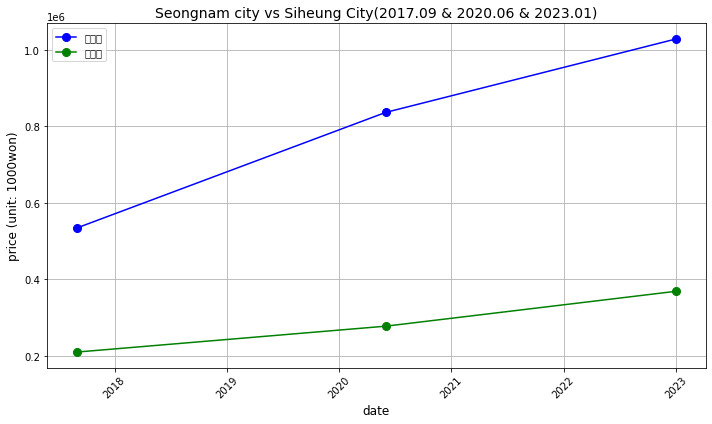

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


##데이터 불러오기
아파트매매가격 = pd.read_excel('/Users/sia/Desktop/캡스톤/월별동향_아파트_매매가격.xlsx',header=None)

###성남시아파트매매가격
df = 아파트매매가격.iloc[[0, 47], 1:151].T
df.columns = ['날짜', '성남시아파트매매가격']
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y.%m', errors='coerce')
df['성남시아파트매매가격'] = pd.to_numeric(df['성남시아파트매매가격'], errors='coerce')

###시흥시아파트매매가격
test_df = 아파트매매가격.iloc[[0, 75], 1:151].T
test_df.columns = ['날짜', '시흥시아파트매매가격']
test_df['날짜'] = pd.to_datetime(test_df['날짜'], format='%Y.%m', errors='coerce')
test_df['시흥시아파트매매가격'] = pd.to_numeric(test_df['시흥시아파트매매가격'], errors='coerce')



# 2017년 9월과 2020년 6월 시점에서의 데이터 추출
df_selected = df[df['날짜'].isin([pd.Timestamp('2017-09'), pd.Timestamp('2020-06'),  pd.Timestamp('2023-01')])]
test_df_selected = test_df[test_df['날짜'].isin([pd.Timestamp('2017-09'), pd.Timestamp('2020-06'),  pd.Timestamp('2023-01')])]

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 성남시 아파트 매매 가격
plt.plot(df_selected['날짜'].values, df_selected['성남시아파트매매가격'].values, marker='o', label='성남시', color='blue', linestyle='-', markersize=8)

# 시흥시 아파트 매매 가격
plt.plot(test_df_selected['날짜'].values, test_df_selected['시흥시아파트매매가격'].values, marker='o', label='시흥시', color='green', linestyle='-', markersize=8)

# 시각화 옵션
plt.title('Seongnam city vs Siheung City(2017.09 & 2020.06 & 2023.01)', fontsize=14)
plt.xlabel('date', fontsize=12)
plt.ylabel('price (unit: 1000won)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

# 그래프 출력
plt.grid(True)
plt.tight_layout()
plt.show()


/Library/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Library/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/var/folders/1k/3rk52gf13kzd13dmy39stq980000gn/T/ipykernel_82804/105352405.py:38: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
/var/folders/1k/3rk52gf13kzd13dmy39stq980000gn/T/ipykernel_82804/105352405.py:38: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
/var/folders/1k/3rk52gf13kzd13dmy39stq980000gn/T/ipykernel_82804/105352405.py:38: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  

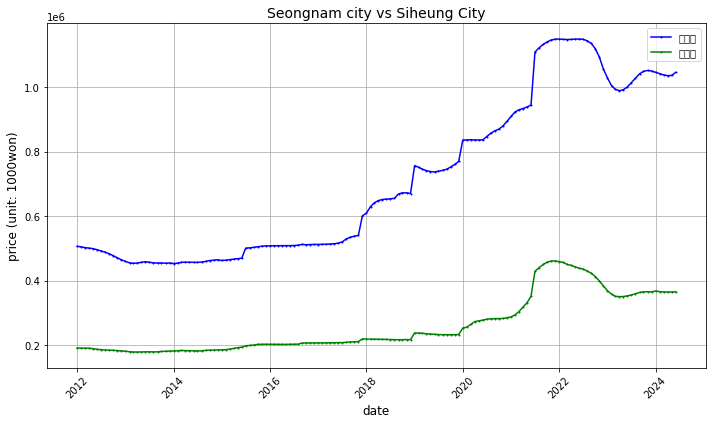

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

##데이터 불러오기
아파트매매가격 = pd.read_excel('/Users/sia/Desktop/캡스톤/월별동향_아파트_매매가격.xlsx',header=None)

###성남시아파트매매가격
df = 아파트매매가격.iloc[[0, 47], 1:151].T
df.columns = ['날짜', '성남시아파트매매가격']
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y.%m', errors='coerce')
df['성남시아파트매매가격'] = pd.to_numeric(df['성남시아파트매매가격'], errors='coerce')

###시흥시아파트매매가격
test_df = 아파트매매가격.iloc[[0, 75], 1:151].T
test_df.columns = ['날짜', '시흥시아파트매매가격']
test_df['날짜'] = pd.to_datetime(test_df['날짜'], format='%Y.%m', errors='coerce')
test_df['시흥시아파트매매가격'] = pd.to_numeric(test_df['시흥시아파트매매가격'], errors='coerce')


# 그래프 그리기
plt.figure(figsize=(10, 6))

# 성남시 아파트 매매 가격 전체 데이터
plt.plot(df['날짜'].values, df['성남시아파트매매가격'].values, marker='o', label='성남시', color='blue', linestyle='-', markersize=1)

# 시흥시 아파트 매매 가격 전체 데이터
plt.plot(test_df['날짜'].values, test_df['시흥시아파트매매가격'].values, marker='o', label='시흥시', color='green', linestyle='-', markersize=1)

# 시각화 옵션
plt.title('Seongnam city vs Siheung City', fontsize=14)
plt.xlabel('date', fontsize=12)
plt.ylabel('price (unit: 1000won)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

# 그래프 출력
plt.grid(True)
plt.tight_layout()
plt.show()
